http://localhost:8080/notebooks/git/siim-isic-melanoma-classification/working/MelEda0628A1__about_crop_dark_margins.ipynb#

In [1]:
PRFX = 'MelPrp0628A1'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from joblib import Parallel, delayed
import numpy as np

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')


# copy

In [3]:
# mkdir -p ../output/{PRFX}

In [4]:
p_out = f'../output/{PRFX}'

In [7]:
# cp ../output/MelPrp0626A2/train_all.csv $p_out/train_all_original.csv

In [8]:
dftrn_original = pd.read_csv(f'{p_out}/train_all_original.csv')

dftrn_original.head()

,source,im_pth,patient_id,target
0,20,../input/siim-isic-melanoma-classification/jpe...,IP_7279968,0.0
1,20,../input/siim-isic-melanoma-classification/jpe...,IP_3075186,0.0
2,20,../input/siim-isic-melanoma-classification/jpe...,IP_2842074,0.0
3,20,../input/siim-isic-melanoma-classification/jpe...,IP_6890425,0.0
4,20,../input/siim-isic-melanoma-classification/jpe...,IP_8723313,0.0


In [9]:
# !cp -r ../input/siim-isic-melanoma-classification/ $output/
# !cp -r ../input/andrewmvd--isic-2019/ $output/

In [10]:
dftrn = dftrn_original.copy()
dftrn['im_pth'] = dftrn_original.im_pth.apply(lambda x: x.replace('../input', p_out))

In [11]:
dftrn.head()

,source,im_pth,patient_id,target
0,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_8723313,0.0


In [12]:
dftrn.to_csv(f'{p_out}/train_all.csv', index=False)

# crop

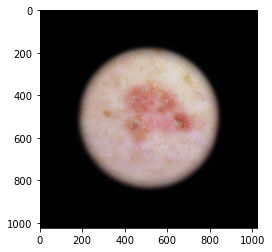

In [13]:
fnm0 = '../input/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0073022.jpg'
plt.imshow(Image.open(fnm0));

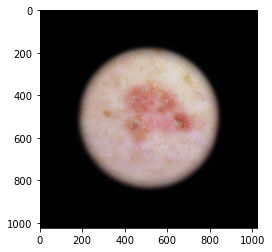

In [14]:
fnm1 = fnm0.replace('../input', p_out)
plt.imshow(Image.open(fnm1));

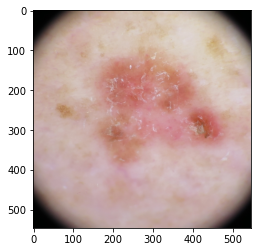

In [15]:
def crop(fnm, keep_less=0.825):
    img = cv2.imread(fnm)
    keep_less=0.80
    img_cropped = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,gray = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if not contours: return
    cnt = max(contours, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(cnt)
    r = r*keep_less
    if r<100: return
    x = int(x); y = int(y); r = int(r)
    img_cropped = img_cropped[0 + (y-r)*int(r<y):-1 + (y+r+1)*int(r<y),0 + (x-r)*int(r<x):-1 + (x+r+1)*int(r<x)]
    img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
    return img_cropped
img_cropped = crop(fnm1)
plt.imshow(img_cropped);

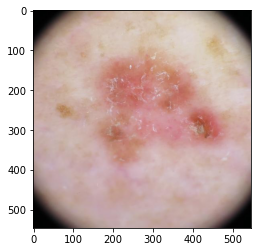

In [16]:
fnm_new = fnm1.replace(p_out, 'tmp')
Image.fromarray(img_cropped).save(fnm_new)
plt.imshow(Image.open(fnm_new));

In [17]:
def crop_and_maybe_replace(fnm):
    img_cropped = crop(fnm)
    if img_cropped is not None: 
        Image.fromarray(img_cropped).save(fnm)

## crop train

In [18]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftrn.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   32.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   41.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   50.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.4min
[Parallel(

[Parallel(n_jobs=4)]: Done 9377 tasks      | elapsed: 127.4min
[Parallel(n_jobs=4)]: Done 9514 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 9653 tasks      | elapsed: 131.6min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 133.8min
[Parallel(n_jobs=4)]: Done 9933 tasks      | elapsed: 135.9min
[Parallel(n_jobs=4)]: Done 10074 tasks      | elapsed: 137.9min
[Parallel(n_jobs=4)]: Done 10217 tasks      | elapsed: 140.2min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 142.1min
[Parallel(n_jobs=4)]: Done 10505 tasks      | elapsed: 144.0min
[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 146.1min
[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 148.0min
[Parallel(n_jobs=4)]: Done 10944 tasks      | elapsed: 150.1min
[Parallel(n_jobs=4)]: Done 11093 tasks      | elapsed: 152.2min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 154.2min
[Parallel(n_jobs=4)]: Done 11393 tasks      | elapsed: 156.4min
[Parallel(n_jobs=4)]: Done 11544 tasks      |

[Parallel(n_jobs=4)]: Done 35370 tasks      | elapsed: 449.5min
[Parallel(n_jobs=4)]: Done 35637 tasks      | elapsed: 449.7min
[Parallel(n_jobs=4)]: Done 35904 tasks      | elapsed: 450.0min
[Parallel(n_jobs=4)]: Batch computation too fast (0.1967s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done 36270 tasks      | elapsed: 450.2min
[Parallel(n_jobs=4)]: Done 36808 tasks      | elapsed: 450.4min
[Parallel(n_jobs=4)]: Done 37350 tasks      | elapsed: 450.7min
[Parallel(n_jobs=4)]: Done 37892 tasks      | elapsed: 450.9min
[Parallel(n_jobs=4)]: Done 38438 tasks      | elapsed: 451.2min
[Parallel(n_jobs=4)]: Done 38984 tasks      | elapsed: 451.4min
[Parallel(n_jobs=4)]: Done 39534 tasks      | elapsed: 451.6min
[Parallel(n_jobs=4)]: Done 40084 tasks      | elapsed: 451.9min
[Parallel(n_jobs=4)]: Done 40638 tasks      | elapsed: 452.1min
[Parallel(n_jobs=4)]: Done 41192 tasks      | elapsed: 452.4min
[Parallel(n_jobs=4)]: Done 41750 tasks      | elapsed: 452.6min
[Parallel(n_jobs=4)]: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## crop test

In [19]:
p_cmp = '../input/siim-isic-melanoma-classification/'

dftst = pd.read_csv(f'{p_cmp}/test.csv')

In [20]:
dftst['im_pth']=f'{p_out}/siim-isic-melanoma-classification/jpeg/test/'+dftst.image_name+'.jpg'

In [21]:
dftst.shape

(10982, 6)

In [36]:
dftst.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0628A1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...


In [23]:
dftst.to_csv(f'{p_out}/test.csv', index=False)

In [35]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftst.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   37.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   52.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.4min
[Parallel(

[Parallel(n_jobs=4)]: Done 9377 tasks      | elapsed: 100.6min
[Parallel(n_jobs=4)]: Done 9514 tasks      | elapsed: 102.0min
[Parallel(n_jobs=4)]: Done 9653 tasks      | elapsed: 103.7min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 105.1min
[Parallel(n_jobs=4)]: Done 9933 tasks      | elapsed: 106.7min
[Parallel(n_jobs=4)]: Done 10074 tasks      | elapsed: 108.2min
[Parallel(n_jobs=4)]: Done 10217 tasks      | elapsed: 109.9min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 111.4min
[Parallel(n_jobs=4)]: Done 10505 tasks      | elapsed: 113.0min
[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 114.2min
[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 115.6min
[Parallel(n_jobs=4)]: Done 10944 tasks      | elapsed: 117.3min
[Parallel(n_jobs=4)]: Done 10982 out of 10982 | elapsed: 117.7min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# inspect result

In [10]:
dftrn = pd.read_csv(f'{p_out}/train_all.csv')
dftst = pd.read_csv(f'{p_out}/test.csv')

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_5806831.jpg


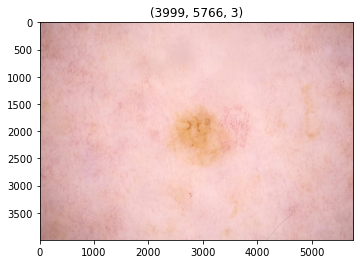

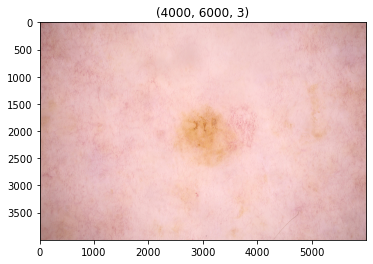

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_7462628.jpg


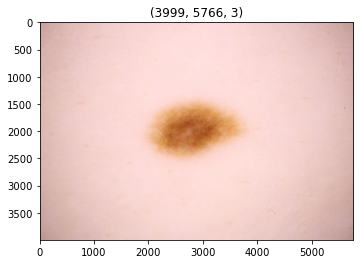

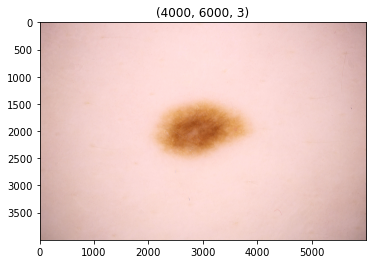

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_7797745.jpg


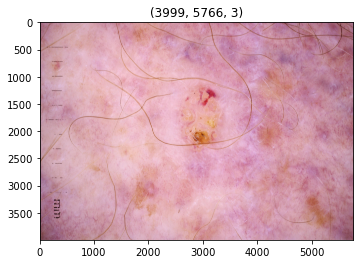

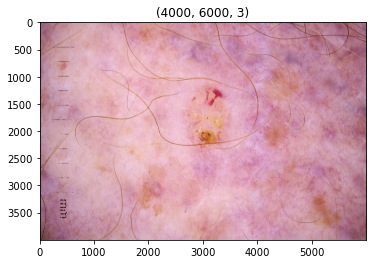

../output/MelPrp0628A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0034186.jpg


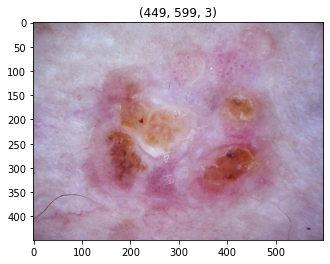

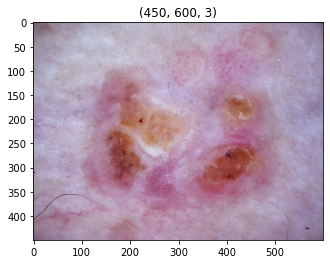

../output/MelPrp0628A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0031101.jpg


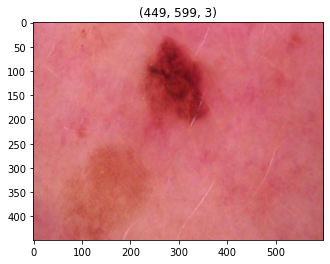

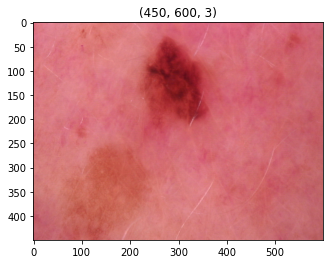

**************************************************


In [18]:
fnms = np.random.choice(dftrn.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, '../input')
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_8389896.jpg


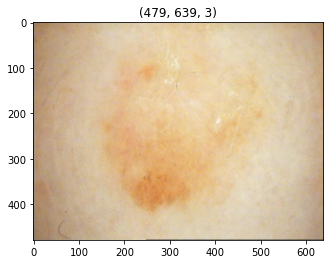

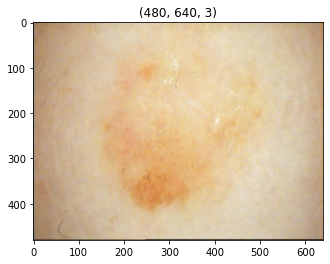

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_4201584.jpg


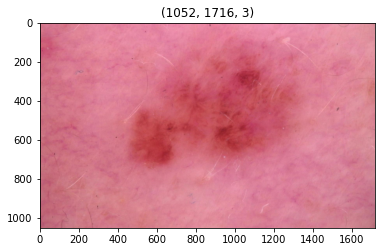

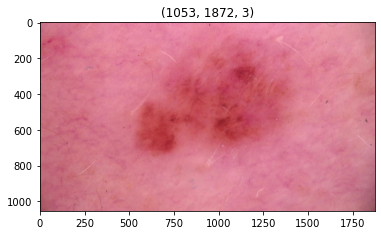

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_2414770.jpg


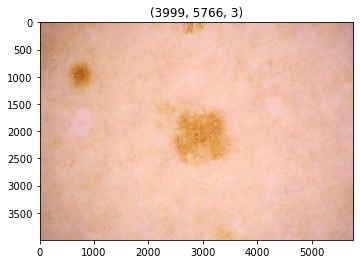

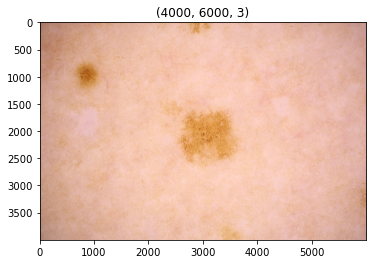

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_4578458.jpg


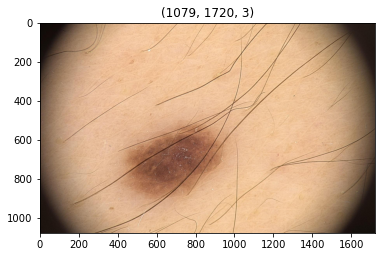

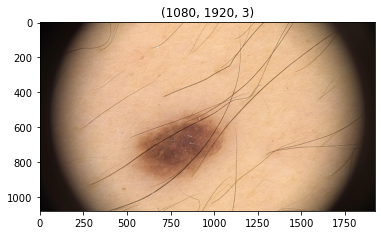

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_7302489.jpg


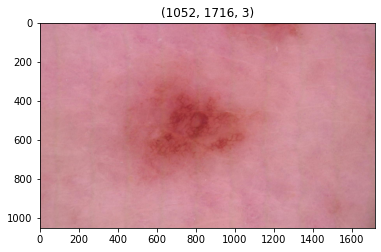

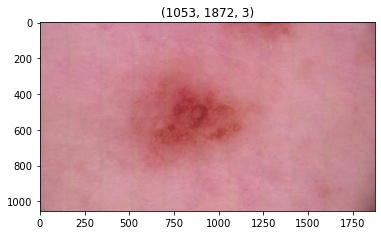

**************************************************


In [17]:
fnms = np.random.choice(dftst.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, '../input')
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)